In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import os
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
def fid_columns(df, fid):
    cols = [c for c in df.columns if c.startswith(fid)]
    return cols

def get_fid_col_processed(fid_col):
    return fid_col.replace('-','_').replace('.','_')

def binarize(pheno_arr, func_case, func_control):
    # func_case/func_control: functions applied to each element of pheno_arr returning True or False for cases (2) and 
    #                         controls (1) respectively. If both of them return False, 0 = NA is produced.
    return np.array([1 if func_control(x) else (2 if func_case(x) else 0) for x in pheno_arr])

def set_na_quantitative(pheno_arr, func_na):
    return np.array([np.nan if func_na(x) else x for x in pheno_arr])

def rank_inv_norm_transform(arr, c=3.0/8):
    # c = 3/8 is default in many software packages, it's called Blom ranked-based inverse normal transform
    i_valid = np.isfinite(arr)
    arr_valid = arr[i_valid]
    rank = ss.rankdata(arr_valid, method="average") # average ordinal
    n = i_valid.sum()
    arr_out = np.array([np.nan]*len(arr))
    arr_out[i_valid] = ss.norm.ppf( (rank - c) / (n - 2*c + 1) )
    return arr_out

In [65]:
# Parameters
run_all = False
pheno_file = "/cluster/projects/p33/users/alexeas/most_mental/pheno/touchscreen_17_mixed.csv"
out_file = "/cluster/projects/p33/users/alexeas/most_mental/pheno/touchscreen_17_mixed.processed.csv"
df = pd.read_csv(pheno_file)
df.head()

,eid,4526-0.0,4526-1.0,4526-2.0,4526-3.0,4537-0.0,4537-1.0,4537-2.0,4537-3.0,4548-0.0,...,6145-2.2,6145-2.3,6145-2.4,6145-2.5,6145-3.0,6145-3.1,6145-3.2,6145-3.3,6145-3.4,6145-3.5
0,1000010,NaN,NaN,3.0,NaN,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000028,NaN,5.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000045,3.0,NaN,3.0,NaN,3.0,NaN,7.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_processed = pd.DataFrame({"FID":df.eid,"IID":df.eid})
df_processed.head()

,FID,IID
0,1000010,1000010
1,1000028,1000028
2,1000034,1000034
3,1000045,1000045
4,1000052,1000052


In [14]:
fid = "4526"
print(fid_columns(df, fid))
fid_col = '4526-0.0'
if False or run_all:
    print(df[fid_col].value_counts())
    func_case = lambda x: x > 3
    func_control = lambda x: 0 < x < 4
    fid_bin = binarize(df[fid_col], func_case, func_control)
    print(Counter(fid_bin))
    df_processed[get_fid_col_processed(fid_col)] = fid_bin
df_processed.head()

['4526-0.0', '4526-1.0', '4526-2.0', '4526-3.0']
 3.0    88615
 2.0    65306
 1.0     9252
 4.0     6462
 5.0     1283
-1.0      929
-3.0      444
 6.0      402
Name: 4526-0.0, dtype: int64
Counter({0: 331166, 1: 163173, 2: 8147})


,FID,IID,4526_0_0
0,1000010,1000010,0
1,1000028,1000028,0
2,1000034,1000034,0
3,1000045,1000045,1
4,1000052,1000052,0


In [16]:
fid = "4537"
print(fid_columns(df, fid))
fid_col = '4537-0.0'
if False or run_all:
    print(df[fid_col].value_counts())
    func_case = lambda x: 3 < x < 7
    func_control = lambda x: 0 < x < 4
    fid_bin = binarize(df[fid_col], func_case, func_control)
    print(Counter(fid_bin))
    df_processed[get_fid_col_processed(fid_col)] = fid_bin
df_processed.head()

['4537-0.0', '4537-1.0', '4537-2.0', '4537-3.0']
 3.0    55231
 7.0    50829
 2.0    43226
 1.0    10084
 4.0     8562
 5.0     2225
 6.0     1014
-1.0      810
-3.0      712
Name: 4537-0.0, dtype: int64
Counter({0: 382144, 1: 108541, 2: 11801})


,FID,IID,4526_0_0,4537_0_0
0,1000010,1000010,0,0
1,1000028,1000028,0,0
2,1000034,1000034,0,0
3,1000045,1000045,1,1
4,1000052,1000052,0,0


In [21]:
fid = "4548"
print(fid_columns(df, fid))
fid_col = '4548-0.0'
if False or run_all:
    print(df[fid_col].value_counts())
    func_case = lambda x: 3 < x < 7
    func_control = lambda x: 0 < x < 4
    fid_bin = binarize(df[fid_col], func_case, func_control)
    print(Counter(fid_bin))
    df_processed[get_fid_col_processed(fid_col)] = fid_bin
df_processed.head()

['4548-0.0', '4548-1.0', '4548-2.0', '4548-3.0']
 3.0    84678
 2.0    54348
 4.0    16915
 1.0     8433
 5.0     4942
 6.0     2048
-1.0      953
-3.0      376
Name: 4548-0.0, dtype: int64
Counter({0: 331122, 1: 147459, 2: 23905})


,FID,IID,4526_0_0,4537_0_0,4548_0_0
0,1000010,1000010,0,0,0
1,1000028,1000028,0,0,0
2,1000034,1000034,0,0,0
3,1000045,1000045,1,1,1
4,1000052,1000052,0,0,0


In [24]:
fid = "4559"
print(fid_columns(df, fid))
fid_col = '4559-0.0'
if False or run_all:
    print(df[fid_col].value_counts())
    func_case = lambda x: 3 < x < 7
    func_control = lambda x: 0 < x < 4
    fid_bin = binarize(df[fid_col], func_case, func_control)
    print(Counter(fid_bin))
    df_processed[get_fid_col_processed(fid_col)] = fid_bin
df_processed.head()

['4559-0.0', '4559-1.0', '4559-2.0', '4559-3.0']
 2.0    76450
 3.0    48722
 1.0    33897
 4.0     7906
 5.0     2397
-1.0     1256
 6.0     1079
-3.0      986
Name: 4559-0.0, dtype: int64
Counter({0: 332035, 1: 159069, 2: 11382})


,FID,IID,4526_0_0,4537_0_0,4548_0_0,4559_0_0
0,1000010,1000010,0,0,0,0
1,1000028,1000028,0,0,0,0
2,1000034,1000034,0,0,0,0
3,1000045,1000045,1,1,1,0
4,1000052,1000052,0,0,0,0


In [26]:
fid = "4570"
print(fid_columns(df, fid))
fid_col = '4570-0.0'
if False or run_all:
    print(df[fid_col].value_counts())
    func_case = lambda x: 3 < x < 7
    func_control = lambda x: 0 < x < 4
    fid_bin = binarize(df[fid_col], func_case, func_control)
    print(Counter(fid_bin))
    df_processed[get_fid_col_processed(fid_col)] = fid_bin
df_processed.head()

['4570-0.0', '4570-1.0', '4570-2.0', '4570-3.0']
 2.0    87864
 3.0    54370
 1.0    22093
 4.0     4468
-1.0     1966
 5.0      843
-3.0      742
 6.0      347
Name: 4570-0.0, dtype: int64
Counter({0: 332501, 1: 164327, 2: 5658})


,FID,IID,4526_0_0,4537_0_0,4548_0_0,4559_0_0,4570_0_0
0,1000010,1000010,0,0,0,0,0
1,1000028,1000028,0,0,0,0,0
2,1000034,1000034,0,0,0,0,0
3,1000045,1000045,1,1,1,0,1
4,1000052,1000052,0,0,0,0,0


In [27]:
fid = "4581"
print(fid_columns(df, fid))
fid_col = '4581-0.0'
if False or run_all:
    print(df[fid_col].value_counts())
    func_case = lambda x: 3 < x < 7
    func_control = lambda x: 0 < x < 4
    fid_bin = binarize(df[fid_col], func_case, func_control)
    print(Counter(fid_bin))
    df_processed[get_fid_col_processed(fid_col)] = fid_bin
df_processed.head()

['4581-0.0', '4581-1.0', '4581-2.0', '4581-3.0']
 3.0    78743
 2.0    54766
 4.0    15615
 1.0    12421
 5.0     5914
 6.0     3368
-3.0      977
-1.0      889
Name: 4581-0.0, dtype: int64
Counter({0: 331659, 1: 145930, 2: 24897})


,FID,IID,4526_0_0,4537_0_0,4548_0_0,4559_0_0,4570_0_0,4581_0_0
0,1000010,1000010,0,0,0,0,0,0
1,1000028,1000028,0,0,0,0,0,0
2,1000034,1000034,0,0,0,0,0,0
3,1000045,1000045,1,1,1,0,1,1
4,1000052,1000052,0,0,0,0,0,0


In [29]:
fid = "2050"
print(fid_columns(df, fid))
fid_col = '2050-0.0'
if False or run_all:
    print(df[fid_col].value_counts())
    func_case = lambda x: 2 < x < 5
    func_control = lambda x: 0 < x < 3
    fid_bin = binarize(df[fid_col], func_case, func_control)
    print(Counter(fid_bin))
    df_processed[get_fid_col_processed(fid_col)] = fid_bin
df_processed.head()

['2050-0.0', '2050-1.0', '2050-2.0', '2050-3.0']
 1.0    365024
 2.0     88993
-1.0     20475
 3.0     14787
 4.0      9510
-3.0      2789
Name: 2050-0.0, dtype: int64
Counter({1: 454017, 2: 24297, 0: 24172})


,FID,IID,4526_0_0,4537_0_0,4548_0_0,4559_0_0,4570_0_0,4581_0_0,2050_0_0
0,1000010,1000010,0,0,0,0,0,0,1
1,1000028,1000028,0,0,0,0,0,0,1
2,1000034,1000034,0,0,0,0,0,0,1
3,1000045,1000045,1,1,1,0,1,1,1
4,1000052,1000052,0,0,0,0,0,0,1


In [30]:
fid = "2060"
print(fid_columns(df, fid))
fid_col = '2060-0.0'
if False or run_all:
    print(df[fid_col].value_counts())
    func_case = lambda x: 2 < x < 5
    func_control = lambda x: 0 < x < 3
    fid_bin = binarize(df[fid_col], func_case, func_control)
    print(Counter(fid_bin))
    df_processed[get_fid_col_processed(fid_col)] = fid_bin
df_processed.head()

['2060-0.0', '2060-1.0', '2060-2.0', '2060-3.0']
 1.0    379000
 2.0     79052
-1.0     16968
 3.0     14107
 4.0     10520
-3.0      1930
Name: 2060-0.0, dtype: int64
Counter({1: 458052, 2: 24627, 0: 19807})


,FID,IID,4526_0_0,4537_0_0,4548_0_0,4559_0_0,4570_0_0,4581_0_0,2050_0_0,2060_0_0
0,1000010,1000010,0,0,0,0,0,0,1,1
1,1000028,1000028,0,0,0,0,0,0,1,2
2,1000034,1000034,0,0,0,0,0,0,1,1
3,1000045,1000045,1,1,1,0,1,1,1,1
4,1000052,1000052,0,0,0,0,0,0,1,1


In [31]:
fid = "2070"
print(fid_columns(df, fid))
fid_col = '2070-0.0'
if False or run_all:
    print(df[fid_col].value_counts())
    func_case = lambda x: 2 < x < 5
    func_control = lambda x: 0 < x < 3
    fid_bin = binarize(df[fid_col], func_case, func_control)
    print(Counter(fid_bin))
    df_processed[get_fid_col_processed(fid_col)] = fid_bin
df_processed.head()

['2070-0.0', '2070-1.0', '2070-2.0', '2070-3.0']
 1.0    352069
 2.0    105451
-1.0     19577
 3.0     13428
 4.0      9344
-3.0      1707
Name: 2070-0.0, dtype: int64
Counter({1: 457520, 2: 22772, 0: 22194})


,FID,IID,4526_0_0,4537_0_0,4548_0_0,4559_0_0,4570_0_0,4581_0_0,2050_0_0,2060_0_0,2070_0_0
0,1000010,1000010,0,0,0,0,0,0,1,1,1
1,1000028,1000028,0,0,0,0,0,0,1,2,1
2,1000034,1000034,0,0,0,0,0,0,1,1,1
3,1000045,1000045,1,1,1,0,1,1,1,1,1
4,1000052,1000052,0,0,0,0,0,0,1,1,1


In [32]:
fid = "2080"
print(fid_columns(df, fid))
fid_col = '2080-0.0'
if False or run_all:
    print(df[fid_col].value_counts())
    func_case = lambda x: 2 < x < 5
    func_control = lambda x: 0 < x < 3
    fid_bin = binarize(df[fid_col], func_case, func_control)
    print(Counter(fid_bin))
    df_processed[get_fid_col_processed(fid_col)] = fid_bin
df_processed.head()

['2080-0.0', '2080-1.0', '2080-2.0', '2080-3.0']
 1.0    226040
 2.0    197012
 4.0     31552
 3.0     30628
-1.0     14983
-3.0      1360
Name: 2080-0.0, dtype: int64
Counter({1: 423052, 2: 62180, 0: 17254})


,FID,IID,4526_0_0,4537_0_0,4548_0_0,4559_0_0,4570_0_0,4581_0_0,2050_0_0,2060_0_0,2070_0_0,2080_0_0
0,1000010,1000010,0,0,0,0,0,0,1,1,1,1
1,1000028,1000028,0,0,0,0,0,0,1,2,1,2
2,1000034,1000034,0,0,0,0,0,0,1,1,1,1
3,1000045,1000045,1,1,1,0,1,1,1,1,1,1
4,1000052,1000052,0,0,0,0,0,0,1,1,1,1


In [36]:
#NB: for this trait create both binary and quantitative variables
fid = "4609"
print(fid_columns(df, fid))
fid_col = '4609-0.0'
if True or run_all:
    print(df[fid_col].describe())
    # cerate binary version
    func_case = lambda x: x > 52
    func_control = lambda x: 0 <= x <= 52
    fid_bin = binarize(df[fid_col], func_case, func_control)
    print(Counter(fid_bin))
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[processed_fid_col] = fid_bin
    # create quantitative version
    func_na = lambda x: x < 0
    fid_quant = set_na_quantitative(df[fid_col], func_na)
    # Should also apply rank_inv_norm_transform!
    df_processed[f"{processed_fid_col}_quant"] = fid_quant
df_processed.head()

['4609-0.0', '4609-1.0', '4609-2.0', '4609-3.0']
count    89373.000000
mean        12.567162
std         37.932944
min         -3.000000
25%          1.000000
50%          4.000000
75%         12.000000
max        999.000000
Name: 4609-0.0, dtype: float64
Counter({0: 430718, 1: 68832, 2: 2936})


,FID,IID,4526_0_0,4537_0_0,4548_0_0,4559_0_0,4570_0_0,4581_0_0,2050_0_0,2060_0_0,2070_0_0,2080_0_0,4609_0_0,4609_0_0_quant,4620_0_0
0,1000010,1000010,0,0,0,0,0,0,1,1,1,1,0,NaN,0
1,1000028,1000028,0,0,0,0,0,0,1,2,1,2,0,NaN,0
2,1000034,1000034,0,0,0,0,0,0,1,1,1,1,0,NaN,0
3,1000045,1000045,1,1,1,0,1,1,1,1,1,1,1,2.0,1
4,1000052,1000052,0,0,0,0,0,0,1,1,1,1,0,NaN,0


In [35]:
fid = "4620"
print(fid_columns(df, fid))
fid_col = '4620-0.0'
if False or run_all:
    print(df[fid_col].value_counts())
    func_case = lambda x: x > 1
    func_control = lambda x: x == 1
    fid_bin = binarize(df[fid_col], func_case, func_control)
    print(Counter(fid_bin))
    df_processed[get_fid_col_processed(fid_col)] = fid_bin
df_processed.head()

['4620-0.0', '4620-1.0', '4620-2.0', '4620-3.0']
-1.0      23471
 1.0      22034
 2.0      14800
 3.0       8794
 4.0       4839
          ...  
 316.0        1
 280.0        1
 480.0        1
 49.0         1
 153.0        1
Name: 4620-0.0, Length: 129, dtype: int64
Counter({0: 438212, 2: 42240, 1: 22034})


,FID,IID,4526_0_0,4537_0_0,4548_0_0,4559_0_0,4570_0_0,4581_0_0,2050_0_0,2060_0_0,2070_0_0,2080_0_0,4609_0_0,4609_0_0_quant,4620_0_0
0,1000010,1000010,0,0,0,0,0,0,1,1,1,1,0,NaN,0
1,1000028,1000028,0,0,0,0,0,0,1,2,1,2,0,NaN,0
2,1000034,1000034,0,0,0,0,0,0,1,1,1,1,0,NaN,0
3,1000045,1000045,1,1,1,0,1,1,1,1,1,1,1,2.0,1
4,1000052,1000052,0,0,0,0,0,0,1,1,1,1,0,NaN,0


In [37]:
#NB: for this trait create both binary and quantitative variables
fid = "5375"
print(fid_columns(df, fid))
fid_col = '5375-0.0'
if False or run_all:
    print(df[fid_col].describe())
    # cerate binary version
    func_case = lambda x: x > 52
    func_control = lambda x: 0 <= x <= 52
    fid_bin = binarize(df[fid_col], func_case, func_control)
    print(Counter(fid_bin))
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[processed_fid_col] = fid_bin
    # create quantitative version
    func_na = lambda x: x < 0
    fid_quant = set_na_quantitative(df[fid_col], func_na)
    # Should also apply rank_inv_norm_transform!
    df_processed[f"{processed_fid_col}_quant"] = fid_quant
df_processed.head()

['5375-0.0', '5375-1.0', '5375-2.0', '5375-3.0']
count    60547.000000
mean        11.584389
std         38.813117
min         -3.000000
25%          1.000000
50%          3.000000
75%          9.000000
max        999.000000
Name: 5375-0.0, dtype: float64
Counter({0: 456453, 1: 44222, 2: 1811})


,FID,IID,4526_0_0,4537_0_0,4548_0_0,4559_0_0,4570_0_0,4581_0_0,2050_0_0,2060_0_0,2070_0_0,2080_0_0,4609_0_0,4609_0_0_quant,4620_0_0,5375_0_0,5375_0_0_quant
0,1000010,1000010,0,0,0,0,0,0,1,1,1,1,0,NaN,0,0,NaN
1,1000028,1000028,0,0,0,0,0,0,1,2,1,2,0,NaN,0,0,NaN
2,1000034,1000034,0,0,0,0,0,0,1,1,1,1,0,NaN,0,0,NaN
3,1000045,1000045,1,1,1,0,1,1,1,1,1,1,1,2.0,1,0,NaN
4,1000052,1000052,0,0,0,0,0,0,1,1,1,1,0,NaN,0,0,NaN


In [41]:
fid = "5386"
print(fid_columns(df, fid))
fid_col = '5386-0.0'
if False or run_all:
    print(df[fid_col].value_counts())
    func_case = lambda x: x > 1
    func_control = lambda x: x == 1
    fid_bin = binarize(df[fid_col], func_case, func_control)
    print(Counter(fid_bin))
    df_processed[get_fid_col_processed(fid_col)] = fid_bin
df_processed.head()

['5386-0.0', '5386-1.0', '5386-2.0', '5386-3.0']
-1.0      16841
 1.0      13592
 2.0       9896
 3.0       5538
 4.0       3378
          ...  
 67.0         1
 125.0        1
 220.0        1
 95.0         1
 522.0        1
Name: 5386-0.0, Length: 120, dtype: int64
Counter({0: 459808, 2: 29086, 1: 13592})


,FID,IID,4526_0_0,4537_0_0,4548_0_0,4559_0_0,4570_0_0,4581_0_0,2050_0_0,2060_0_0,2070_0_0,2080_0_0,4609_0_0,4609_0_0_quant,4620_0_0,5375_0_0,5375_0_0_quant,5386_0_0
0,1000010,1000010,0,0,0,0,0,0,1,1,1,1,0,NaN,0,0,NaN,0
1,1000028,1000028,0,0,0,0,0,0,1,2,1,2,0,NaN,0,0,NaN,0
2,1000034,1000034,0,0,0,0,0,0,1,1,1,1,0,NaN,0,0,NaN,0
3,1000045,1000045,1,1,1,0,1,1,1,1,1,1,1,2.0,1,0,NaN,0
4,1000052,1000052,0,0,0,0,0,0,1,1,1,1,0,NaN,0,0,NaN,0


In [55]:
#NB: this is multiple responce variable, should be treated in a special way
# 11	I was more active than usual
# 12	I was more talkative than usual
# 13	I needed less sleep than usual
# 14	I was more creative or had more ideas than usual
# 15	All of the above
# -7	None of the above
fid = "6156"
print(fid_columns(df, fid))
fid_cols = ['6156-0.0', '6156-0.1', '6156-0.2', '6156-0.3']
if False or run_all:
    values = [11, 12 , 13, 14, 15, -7]
    processed_fid_cols = [f'{fid}_val{i}' for i in range(len(values))]
    df_tmp = df[fid_cols]
    df_bin = pd.DataFrame(1, index=df_processed.index, columns=processed_fid_cols) # set all to controls
    for v,col in zip(values,processed_fid_cols):
        # set cases for value v
        i_v = (df_tmp == v).any(axis=1)
        df_bin.loc[i_v,col] = 2
        print(col)
        print(Counter(df_bin[col]))
        if col in df_processed.columns:
            del df_processed[col]
df_processed = pd.concat([df_processed,df_bin], axis=1)
df_processed.head()

['6156-0.0', '6156-0.1', '6156-0.2', '6156-0.3', '6156-1.0', '6156-1.1', '6156-1.2', '6156-1.3', '6156-2.0', '6156-2.1', '6156-2.2', '6156-2.3', '6156-3.0', '6156-3.1', '6156-3.2', '6156-3.3']
6156_val0
Counter({1: 493333, 2: 9153})
6156_val1
Counter({1: 494864, 2: 7622})
6156_val2
Counter({1: 497489, 2: 4997})
6156_val3
Counter({1: 498133, 2: 4353})
6156_val4
Counter({1: 498740, 2: 3746})
6156_val5
Counter({1: 490056, 2: 12430})


,FID,IID,4526_0_0,4537_0_0,4548_0_0,4559_0_0,4570_0_0,4581_0_0,2050_0_0,2060_0_0,...,4620_0_0,5375_0_0,5375_0_0_quant,5386_0_0,6156_val0,6156_val1,6156_val2,6156_val3,6156_val4,6156_val5
0,1000010,1000010,0,0,0,0,0,0,1,1,...,0,0,NaN,0,1,1,1,1,1,1
1,1000028,1000028,0,0,0,0,0,0,1,2,...,0,0,NaN,0,1,1,1,1,1,1
2,1000034,1000034,0,0,0,0,0,0,1,1,...,0,0,NaN,0,1,1,1,1,1,1
3,1000045,1000045,1,1,1,0,1,1,1,1,...,1,0,NaN,0,1,1,1,1,1,1
4,1000052,1000052,0,0,0,0,0,0,1,1,...,0,0,NaN,0,1,1,1,1,1,1


In [59]:
fid = "5663"
print(fid_columns(df, fid))
fid_col = '5663-0.0'
if False or run_all:
    print(df[fid_col].value_counts())
    func_case = lambda x: x > 12
    func_control = lambda x: 0 < x < 13
    fid_bin = binarize(df[fid_col], func_case, func_control)
    print(Counter(fid_bin))
    df_processed[get_fid_col_processed(fid_col)] = fid_bin
df_processed.head()

['5663-0.0', '5663-1.0', '5663-2.0', '5663-3.0']
 11.0    17285
-1.0      6782
 13.0     6155
 12.0     5543
-3.0       309
Name: 5663-0.0, dtype: int64
Counter({0: 473503, 1: 22828, 2: 6155})


,FID,IID,4526_0_0,4537_0_0,4548_0_0,4559_0_0,4570_0_0,4581_0_0,2050_0_0,2060_0_0,...,5375_0_0,5375_0_0_quant,5386_0_0,6156_val0,6156_val1,6156_val2,6156_val3,6156_val4,6156_val5,5663_0_0
0,1000010,1000010,0,0,0,0,0,0,1,1,...,0,NaN,0,1,1,1,1,1,1,0
1,1000028,1000028,0,0,0,0,0,0,1,2,...,0,NaN,0,1,1,1,1,1,1,0
2,1000034,1000034,0,0,0,0,0,0,1,1,...,0,NaN,0,1,1,1,1,1,1,0
3,1000045,1000045,1,1,1,0,1,1,1,1,...,0,NaN,0,1,1,1,1,1,1,0
4,1000052,1000052,0,0,0,0,0,0,1,1,...,0,NaN,0,1,1,1,1,1,1,0


In [64]:
#NB: this is multiple responce variable, should be treated in a special way
# 1	Serious illness, injury or assault to yourself
# 2	Serious illness, injury or assault of a close relative
# 3	Death of a close relative
# 4	Death of a spouse or partner
# 5	Marital separation/divorce
# 6	Financial difficulties
# -7	None of the above
# -3	Prefer not to answer
fid = "6145"
print(fid_columns(df, fid))
fid_cols = ['6145-0.0', '6145-0.1', '6145-0.2', '6145-0.3', '6145-0.4', '6145-0.5']
if False or run_all:
    values = [1, 2 , 3, 4, 5, 6, -7]
    processed_fid_cols = [f'{fid}_val{i}' for i in range(len(values))]
    df_tmp = df[fid_cols]
    df_bin = pd.DataFrame(1, index=df_processed.index, columns=processed_fid_cols) # set all to controls
    for v,col in zip(values,processed_fid_cols):
        # set cases for value v
        i_v = (df_tmp == v).any(axis=1)
        df_bin.loc[i_v,col] = 2
        print(col)
        print(Counter(df_bin[col]))
        if col in df_processed.columns:
            del df_processed[col]
df_processed = pd.concat([df_processed,df_bin], axis=1)
df_processed.head()

['6145-0.0', '6145-0.1', '6145-0.2', '6145-0.3', '6145-0.4', '6145-0.5', '6145-1.0', '6145-1.1', '6145-1.2', '6145-1.3', '6145-1.4', '6145-1.5', '6145-2.0', '6145-2.1', '6145-2.2', '6145-2.3', '6145-2.4', '6145-2.5', '6145-3.0', '6145-3.1', '6145-3.2', '6145-3.3', '6145-3.4', '6145-3.5']
6145_val0
Counter({1: 455587, 2: 46899})
6145_val1
Counter({1: 445509, 2: 56977})
6145_val2
Counter({1: 396137, 2: 106349})
6145_val3
Counter({1: 494685, 2: 7801})
6145_val4
Counter({1: 486746, 2: 15740})
6145_val5
Counter({1: 441166, 2: 61320})
6145_val6
Counter({2: 272289, 1: 230197})


,FID,IID,4526_0_0,4537_0_0,4548_0_0,4559_0_0,4570_0_0,4581_0_0,2050_0_0,2060_0_0,...,6156_val4,6156_val5,5663_0_0,6145_val0,6145_val1,6145_val2,6145_val3,6145_val4,6145_val5,6145_val6
0,1000010,1000010,0,0,0,0,0,0,1,1,...,1,1,0,1,1,1,1,1,1,2
1,1000028,1000028,0,0,0,0,0,0,1,2,...,1,1,0,2,1,1,1,1,2,1
2,1000034,1000034,0,0,0,0,0,0,1,1,...,1,1,0,1,1,1,1,1,1,2
3,1000045,1000045,1,1,1,0,1,1,1,1,...,1,1,0,1,1,1,1,1,1,2
4,1000052,1000052,0,0,0,0,0,0,1,1,...,1,1,0,1,1,1,1,1,1,2


In [67]:
df_processed.to_csv(out_file, index=False, sep="\t", na_rep="NA")

In [45]:
df['6156-0.0'].value_counts()

-7.0     12430
 11.0     9153
 12.0     5328
 15.0     3746
 13.0     3043
 14.0     2374
Name: 6156-0.0, dtype: int64

In [279]:
# Cognitive phenotypes 
run_all = False
pheno_file = "/cluster/projects/p33/users/alexeas/most_mental/pheno/cognitive_27.csv"
pheno_file_online = "/cluster/projects/p33/users/alexeas/most_mental/pheno/cognitive_online_20.csv"
out_file = "/cluster/projects/p33/users/alexeas/most_mental/pheno/cognitive_merged_27_20.processed.csv"
df = pd.read_csv(pheno_file, index_col="eid")
del df["20191-0.0"] # "20191-0.0" should be in online, not in touchscreen (but was fetched for both)
dfo = pd.read_csv(pheno_file_online, index_col="eid")
df = df.join(dfo)
df.head()

,21004-2.0,21004-3.0,6373-2.0,6373-3.0,6348-2.0,6348-3.0,6350-2.0,6350-3.0,23324-2.0,23324-3.0,...,20183-0.0,20185-0.0,20187-0.0,20189-0.0,20132-0.0,20132-0.1,20132-0.2,20133-0.0,20133-0.1,20133-0.2
eid,,,,,,,,,,,,,,,,,,,,,
1000010,8.0,NaN,8.0,NaN,149.0,NaN,408.0,NaN,24.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,1.0,4.0,21231.0,27284.0,44929.0
1000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,3.0,NaN,13259.0,48059.0,NaN
1000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df_processed = pd.DataFrame({"FID":df.index,"IID":df.index})
df_processed.head()

,FID,IID
0,1000010,1000010
1,1000028,1000028
2,1000034,1000034
3,1000045,1000045
4,1000052,1000052


In [54]:
fid = "21004" # No online
              # PHESANT: use ordered logistic regression (n distinct values < 20)
print(fid_columns(df, fid))
fid_col = '21004-2.0'
if True or run_all:
    func_na = lambda x: x < 0
    fid_quant = set_na_quantitative(df[fid_col], func_na)
    fid_quant = rank_inv_norm_transform(fid_quant)
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[f"{processed_fid_col}_quant"] = fid_quant
df_processed.head()

['21004-2.0', '21004-3.0']


,FID,IID,21004_2_0_quant
0,1000010,1000010,-0.598609
1,1000028,1000028,NaN
2,1000034,1000034,NaN
3,1000045,1000045,NaN
4,1000052,1000052,NaN


In [55]:
fid = "6373" # No online
             # PHESANT: use ordered logistic regression (n distinct values < 20)
print(fid_columns(df, fid))
fid_col = '6373-2.0'
if True or run_all:
    func_na = lambda x: x < 0
    fid_quant = set_na_quantitative(df[fid_col], func_na)
    fid_quant = rank_inv_norm_transform(fid_quant)
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[f"{processed_fid_col}_quant"] = fid_quant
df_processed.head()

['6373-2.0', '6373-3.0']


,FID,IID,21004_2_0_quant,6373_2_0_quant
0,1000010,1000010,-0.598609,-0.022079
1,1000028,1000028,NaN,NaN
2,1000034,1000034,NaN,NaN
3,1000045,1000045,NaN,NaN
4,1000052,1000052,NaN,NaN


In [141]:
fid = "6348" # Has online
fid_online = "20156"
print(fid_columns(df, fid))
print(fid_columns(df, fid_online))
fid_col = '6348-2.0'
fid_online_col = '20156-0.0'
if True or run_all:
    func_na = lambda x: x < 0
    fid_quant = set_na_quantitative(df[fid_col], func_na)
    fid_quant_online = set_na_quantitative(df[fid_online_col], func_na)
    fid_quant = rank_inv_norm_transform(fid_quant)
    fid_quant_online = rank_inv_norm_transform(fid_quant_online)
    # for this trait we decided to test TS and OL version separately, together with the merged version
    df_processed[f"{get_fid_col_processed(fid_col)}_quant_nomerge"] = fid_quant # TS alone
    df_processed[f"{get_fid_col_processed(fid_online_col)}_quant_nomerge"] = fid_quant_online # OL alone
    # then merged TS | OL
    i_nan = np.isnan(fid_quant)
    fid_quant[i_nan] = fid_quant_online[i_nan]
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[f"{processed_fid_col}_quant"] = fid_quant
df_processed.head()

['6348-2.0', '6348-3.0']
['20156-0.0']


,FID,IID,21004_2_0_quant,6373_2_0_quant,6348_2_0_quant,6350_2_0_quant,23324_2_0_quant,4282_0_0_quant,20016_0_0_quant,4935_0_0,4946_0_0,4957_0_0,4968_0_0,4979_0_0,4990_0_0,6348_2_0_quant_nomerge,20156_0_0_quant_nomerge
0,1000010,1000010,-0.598609,-0.022079,-1.449966,-0.653566,1.018063,NaN,NaN,0,0,0,0,0,0,-1.449966,NaN
1,1000028,1000028,NaN,NaN,NaN,NaN,0.856492,0.751320,-1.682020,1,1,2,1,2,2,NaN,NaN
2,1000034,1000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN
3,1000045,1000045,NaN,NaN,1.610677,1.534210,-0.388206,0.976422,0.028069,1,1,1,1,2,1,NaN,1.610677
4,1000052,1000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN


In [68]:
fid = "6350" # Has online
fid_online = "20157"
print(fid_columns(df, fid))
print(fid_columns(df, fid_online))
fid_col = '6350-2.0'
fid_online_col = '20157-0.0'
if True or run_all:
    func_na = lambda x: x < 0
    fid_quant = set_na_quantitative(df[fid_col], func_na)
    fid_quant_online = set_na_quantitative(df[fid_online_col], func_na)
    fid_quant = rank_inv_norm_transform(fid_quant)
    fid_quant_online = rank_inv_norm_transform(fid_quant_online)
    i_nan = np.isnan(fid_quant)
    fid_quant[i_nan] = fid_quant_online[i_nan]
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[f"{processed_fid_col}_quant"] = fid_quant
df_processed.head()

['6350-2.0', '6350-3.0']
['20157-0.0']


,FID,IID,21004_2_0_quant,6373_2_0_quant,6348_2_0_quant,6350_2_0_quant
0,1000010,1000010,-0.598609,-0.022079,-1.449966,-0.653566
1,1000028,1000028,NaN,NaN,NaN,NaN
2,1000034,1000034,NaN,NaN,NaN,NaN
3,1000045,1000045,NaN,NaN,1.610677,1.534210
4,1000052,1000052,NaN,NaN,NaN,NaN


In [74]:
fid = "23324" # Has online
fid_online = "20159"
print(fid_columns(df, fid))
print(fid_columns(df, fid_online))
fid_col = '23324-2.0'
fid_online_col = '20159-0.0'
if True or run_all:
    func_na = lambda x: x < 0
    fid_quant = set_na_quantitative(df[fid_col], func_na)
    fid_quant_online = set_na_quantitative(df[fid_online_col], func_na)
    fid_quant = rank_inv_norm_transform(fid_quant)
    fid_quant_online = rank_inv_norm_transform(fid_quant_online)
    i_nan = np.isnan(fid_quant)
    fid_quant[i_nan] = fid_quant_online[i_nan]
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[f"{processed_fid_col}_quant"] = fid_quant
df_processed.head()

['23324-2.0', '23324-3.0']
['20159-0.0']


,FID,IID,21004_2_0_quant,6373_2_0_quant,6348_2_0_quant,6350_2_0_quant,23324_2_0_quant
0,1000010,1000010,-0.598609,-0.022079,-1.449966,-0.653566,1.018063
1,1000028,1000028,NaN,NaN,NaN,NaN,0.856492
2,1000034,1000034,NaN,NaN,NaN,NaN,NaN
3,1000045,1000045,NaN,NaN,1.610677,1.534210,-0.388206
4,1000052,1000052,NaN,NaN,NaN,NaN,NaN


In [92]:
fid = "4282" # Has online
             # ~30% have the same value = 7
fid_online = "20240"
print(fid_columns(df, fid))
print(fid_columns(df, fid_online))
fid_col = '4282-0.0'
fid_online_col = '20240-0.0'
if True or run_all:
    func_na = lambda x: x < 0
    fid_quant = set_na_quantitative(df[fid_col], func_na)
    fid_quant_online = set_na_quantitative(df[fid_online_col], func_na)
    fid_quant = rank_inv_norm_transform(fid_quant)
    fid_quant_online = rank_inv_norm_transform(fid_quant_online)
    i_nan = np.isnan(fid_quant)
    fid_quant[i_nan] = fid_quant_online[i_nan]
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[f"{processed_fid_col}_quant"] = fid_quant
df_processed.head()

['4282-0.0', '4282-1.0', '4282-2.0', '4282-3.0']
['20240-0.0']


,FID,IID,21004_2_0_quant,6373_2_0_quant,6348_2_0_quant,6350_2_0_quant,23324_2_0_quant,4282_0_0_quant
0,1000010,1000010,-0.598609,-0.022079,-1.449966,-0.653566,1.018063,NaN
1,1000028,1000028,NaN,NaN,NaN,NaN,0.856492,0.751320
2,1000034,1000034,NaN,NaN,NaN,NaN,NaN,NaN
3,1000045,1000045,NaN,NaN,1.610677,1.534210,-0.388206,0.976422
4,1000052,1000052,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
fid = "20016" # Has online
fid_online = "20191"
print(fid_columns(df, fid))
print(fid_columns(df, fid_online))
fid_col = '20016-0.0'
fid_online_col = '20191-0.0'
if True or run_all:
    func_na = lambda x: x < 0
    fid_quant = set_na_quantitative(df[fid_col], func_na)
    fid_quant_online = set_na_quantitative(df[fid_online_col], func_na)
    fid_quant = rank_inv_norm_transform(fid_quant)
    fid_quant_online = rank_inv_norm_transform(fid_quant_online)
    i_nan = np.isnan(fid_quant)
    fid_quant[i_nan] = fid_quant_online[i_nan]
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[f"{processed_fid_col}_quant"] = fid_quant
df_processed.head()

['20016-0.0', '20016-1.0', '20016-2.0', '20016-3.0']
['20191-0.0']


,FID,IID,21004_2_0_quant,6373_2_0_quant,6348_2_0_quant,6350_2_0_quant,23324_2_0_quant,4282_0_0_quant,20016_0_0_quant
0,1000010,1000010,-0.598609,-0.022079,-1.449966,-0.653566,1.018063,NaN,NaN
1,1000028,1000028,NaN,NaN,NaN,NaN,0.856492,0.751320,-1.682020
2,1000034,1000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000045,1000045,NaN,NaN,1.610677,1.534210,-0.388206,0.976422,0.028069
4,1000052,1000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
fid = "4935" # Has online
             # values = [13, 14, 15, 16, 17, dnk, pna]
fid_online = "20165" # values = [1, 2, 3, 4, 5], corresponds to [13, 14, 15, 16, 17] values from touchscreen 4935
print(fid_columns(df, fid))
print(fid_columns(df, fid_online))
fid_col = '4935-0.0'
fid_online_col = '20165-0.0'
if True or run_all:
    # cerate binary version
    func_case = lambda x: x in (13,14,16,17,-1)
    func_control = lambda x: x == 15
    fid_bin = binarize(df[fid_col], func_case, func_control)
    func_case_online = lambda x: x in (1,2,4,5)
    func_control_online = lambda x: x == 3
    fid_bin_online = binarize(df[fid_online_col], func_case_online, func_control_online)
    # after applying binarize() '0' crresponds to NA
    i_na = (fid_bin == 0)
    fid_bin[i_na] = fid_bin_online[i_na]
    print(Counter(fid_bin))
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[processed_fid_col] = fid_bin
df_processed.head()

['4935-0.0', '4935-1.0', '4935-2.0', '4935-3.0']
['20165-0.0']
Counter({0: 261052, 1: 231769, 2: 9686})


,FID,IID,21004_2_0_quant,6373_2_0_quant,6348_2_0_quant,6350_2_0_quant,23324_2_0_quant,4282_0_0_quant,20016_0_0_quant,4935_0_0,4946_0_0,4957_0_0,4968_0_0
0,1000010,1000010,-0.598609,-0.022079,-1.449966,-0.653566,1.018063,NaN,NaN,0,0,0,0
1,1000028,1000028,NaN,NaN,NaN,NaN,0.856492,0.751320,-1.682020,1,1,2,1
2,1000034,1000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,1000045,1000045,NaN,NaN,1.610677,1.534210,-0.388206,0.976422,0.028069,1,1,1,1
4,1000052,1000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [129]:
fid = "4946" # Has online
fid_online = "20167"
print(fid_columns(df, fid))
print(fid_columns(df, fid_online))
fid_col = '4946-0.0'
fid_online_col = '20167-0.0'
if True or run_all:
    # cerate binary version
    func_case = lambda x: x in (642,308,714,253,-1)
    func_control = lambda x: x == 987
    fid_bin = binarize(df[fid_col], func_case, func_control)
    func_case_online = lambda x: x in (1,2,4,5)
    func_control_online = lambda x: x == 3
    fid_bin_online = binarize(df[fid_online_col], func_case_online, func_control_online)
    # after applying binarize() '0' crresponds to NA
    i_na = (fid_bin == 0)
    fid_bin[i_na] = fid_bin_online[i_na]
    print(Counter(fid_bin))
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[processed_fid_col] = fid_bin
df_processed.head()

['4946-0.0', '4946-1.0', '4946-2.0', '4946-3.0']
['20167-0.0']
Counter({0: 260814, 1: 239584, 2: 2109})


,FID,IID,21004_2_0_quant,6373_2_0_quant,6348_2_0_quant,6350_2_0_quant,23324_2_0_quant,4282_0_0_quant,20016_0_0_quant,4935_0_0,4946_0_0,4957_0_0,4968_0_0
0,1000010,1000010,-0.598609,-0.022079,-1.449966,-0.653566,1.018063,NaN,NaN,0,0,0,0
1,1000028,1000028,NaN,NaN,NaN,NaN,0.856492,0.751320,-1.682020,1,1,2,1
2,1000034,1000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,1000045,1000045,NaN,NaN,1.610677,1.534210,-0.388206,0.976422,0.028069,1,1,1,1
4,1000052,1000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [130]:
fid = "4957" # Has online
fid_online = "20169"
print(fid_columns(df, fid))
print(fid_columns(df, fid_online))
fid_col = '4957-0.0'
fid_online_col = '20169-0.0'
if True or run_all:
    # cerate binary version
    func_case = lambda x: x in (1,2,3,5,-1)
    func_control = lambda x: x == 4
    fid_bin = binarize(df[fid_col], func_case, func_control)
    func_case_online = lambda x: x in (1,2,3,5)
    func_control_online = lambda x: x == 4
    fid_bin_online = binarize(df[fid_online_col], func_case_online, func_control_online)
    # after applying binarize() '0' crresponds to NA
    i_na = (fid_bin == 0)
    fid_bin[i_na] = fid_bin_online[i_na]
    print(Counter(fid_bin))
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[processed_fid_col] = fid_bin
df_processed.head()

['4957-0.0', '4957-1.0', '4957-2.0', '4957-3.0']
['20169-0.0']
Counter({0: 260979, 1: 199057, 2: 42471})


,FID,IID,21004_2_0_quant,6373_2_0_quant,6348_2_0_quant,6350_2_0_quant,23324_2_0_quant,4282_0_0_quant,20016_0_0_quant,4935_0_0,4946_0_0,4957_0_0,4968_0_0
0,1000010,1000010,-0.598609,-0.022079,-1.449966,-0.653566,1.018063,NaN,NaN,0,0,0,0
1,1000028,1000028,NaN,NaN,NaN,NaN,0.856492,0.751320,-1.682020,1,1,2,1
2,1000034,1000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,1000045,1000045,NaN,NaN,1.610677,1.534210,-0.388206,0.976422,0.028069,1,1,1,1
4,1000052,1000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [131]:
fid = "4968" # Has online
fid_online = "20171"
print(fid_columns(df, fid))
print(fid_columns(df, fid_online))
fid_col = '4968-0.0'
fid_online_col = '20171-0.0'
if True or run_all:
    # cerate binary version
    func_case = lambda x: x in (5,7,8,-1) # include do not know as incorrect
    func_control = lambda x: x == 6
    fid_bin = binarize(df[fid_col], func_case, func_control)
    func_case_online = lambda x: x in (1,3,4,5)
    func_control_online = lambda x: x == 2
    fid_bin_online = binarize(df[fid_online_col], func_case_online, func_control_online)
    # after applying binarize() '0' crresponds to NA
    i_na = (fid_bin == 0)
    fid_bin[i_na] = fid_bin_online[i_na]
    print(Counter(fid_bin))
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[processed_fid_col] = fid_bin
df_processed.head()

['4968-0.0', '4968-1.0', '4968-2.0', '4968-3.0']
['20171-0.0']
Counter({0: 263089, 1: 203029, 2: 36389})


,FID,IID,21004_2_0_quant,6373_2_0_quant,6348_2_0_quant,6350_2_0_quant,23324_2_0_quant,4282_0_0_quant,20016_0_0_quant,4935_0_0,4946_0_0,4957_0_0,4968_0_0
0,1000010,1000010,-0.598609,-0.022079,-1.449966,-0.653566,1.018063,NaN,NaN,0,0,0,0
1,1000028,1000028,NaN,NaN,NaN,NaN,0.856492,0.751320,-1.682020,1,1,2,1
2,1000034,1000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,1000045,1000045,NaN,NaN,1.610677,1.534210,-0.388206,0.976422,0.028069,1,1,1,1
4,1000052,1000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [135]:
fid = "4979" # Has online
fid_online = "20173"
print(fid_columns(df, fid))
print(fid_columns(df, fid_online))
fid_col = '4979-0.0'
fid_online_col = '20173-0.0'
if True or run_all:
    # cerate binary version
    func_case = lambda x: x in (1,2,3,5,-1) # include do not know as incorrect
    func_control = lambda x: x == 4
    fid_bin = binarize(df[fid_col], func_case, func_control)
    func_case_online = lambda x: x in (1,2,3,5)
    func_control_online = lambda x: x == 4
    fid_bin_online = binarize(df[fid_online_col], func_case_online, func_control_online)
    # after applying binarize() '0' crresponds to NA
    i_na = (fid_bin == 0)
    fid_bin[i_na] = fid_bin_online[i_na]
    print(Counter(fid_bin))
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[processed_fid_col] = fid_bin
df_processed.head()

['4979-0.0', '4979-1.0', '4979-2.0', '4979-3.0']
['20173-0.0']
Counter({0: 268892, 1: 119446, 2: 114169})


,FID,IID,21004_2_0_quant,6373_2_0_quant,6348_2_0_quant,6350_2_0_quant,23324_2_0_quant,4282_0_0_quant,20016_0_0_quant,4935_0_0,4946_0_0,4957_0_0,4968_0_0,4979_0_0
0,1000010,1000010,-0.598609,-0.022079,-1.449966,-0.653566,1.018063,NaN,NaN,0,0,0,0,0
1,1000028,1000028,NaN,NaN,NaN,NaN,0.856492,0.751320,-1.682020,1,1,2,1,2
2,1000034,1000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
3,1000045,1000045,NaN,NaN,1.610677,1.534210,-0.388206,0.976422,0.028069,1,1,1,1,2
4,1000052,1000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0


In [139]:
fid = "4990" # Has online
fid_online = "20175"
print(fid_columns(df, fid))
print(fid_columns(df, fid_online))
fid_col = '4990-0.0'
fid_online_col = '20175-0.0'
if True or run_all:
    # cerate binary version
    func_case = lambda x: x in (68,70,71,72,-1) # include do not know as incorrect
    func_control = lambda x: x == 69
    fid_bin = binarize(df[fid_col], func_case, func_control)
    func_case_online = lambda x: x in (1,3,4,5)
    func_control_online = lambda x: x == 2
    fid_bin_online = binarize(df[fid_online_col], func_case_online, func_control_online)
    # after applying binarize() '0' crresponds to NA
    i_na = (fid_bin == 0)
    fid_bin[i_na] = fid_bin_online[i_na]
    print(Counter(fid_bin))
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[processed_fid_col] = fid_bin
df_processed.head()

['4990-0.0', '4990-1.0', '4990-2.0', '4990-3.0']
['20175-0.0']
Counter({0: 292869, 1: 145676, 2: 63962})


,FID,IID,21004_2_0_quant,6373_2_0_quant,6348_2_0_quant,6350_2_0_quant,23324_2_0_quant,4282_0_0_quant,20016_0_0_quant,4935_0_0,4946_0_0,4957_0_0,4968_0_0,4979_0_0,4990_0_0
0,1000010,1000010,-0.598609,-0.022079,-1.449966,-0.653566,1.018063,NaN,NaN,0,0,0,0,0,0
1,1000028,1000028,NaN,NaN,NaN,NaN,0.856492,0.751320,-1.682020,1,1,2,1,2,2
2,1000034,1000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
3,1000045,1000045,NaN,NaN,1.610677,1.534210,-0.388206,0.976422,0.028069,1,1,1,1,2,1
4,1000052,1000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0


In [143]:
fid = "5001" # Has online
fid_online = "20177"
print(fid_columns(df, fid))
print(fid_columns(df, fid_online))
fid_col = '5001-0.0'
fid_online_col = '20177-0.0'
if True or run_all:
    # cerate binary version
    func_case = lambda x: x in (1,2,4,5,-1) # include do not know as incorrect
    func_control = lambda x: x == 3
    fid_bin = binarize(df[fid_col], func_case, func_control)
    func_case_online = lambda x: x in (1,2,4,5)
    func_control_online = lambda x: x == 3
    fid_bin_online = binarize(df[fid_online_col], func_case_online, func_control_online)
    # after applying binarize() '0' crresponds to NA
    i_na = (fid_bin == 0)
    fid_bin[i_na] = fid_bin_online[i_na]
    print(Counter(fid_bin))
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[processed_fid_col] = fid_bin
df_processed.head()

['5001-0.0', '5001-1.0', '5001-2.0', '5001-3.0']
['20177-0.0']
Counter({0: 329698, 1: 152942, 2: 19867})


,FID,IID,21004_2_0_quant,6373_2_0_quant,6348_2_0_quant,6350_2_0_quant,23324_2_0_quant,4282_0_0_quant,20016_0_0_quant,4935_0_0,4946_0_0,4957_0_0,4968_0_0,4979_0_0,4990_0_0,6348_2_0_quant_nomerge,20156_0_0_quant_nomerge,5001_0_0
0,1000010,1000010,-0.598609,-0.022079,-1.449966,-0.653566,1.018063,NaN,NaN,0,0,0,0,0,0,-1.449966,NaN,0
1,1000028,1000028,NaN,NaN,NaN,NaN,0.856492,0.751320,-1.682020,1,1,2,1,2,2,NaN,NaN,0
2,1000034,1000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,0
3,1000045,1000045,NaN,NaN,1.610677,1.534210,-0.388206,0.976422,0.028069,1,1,1,1,2,1,NaN,1.610677,2
4,1000052,1000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,0


In [145]:
fid = "5012" # Has online
fid_online = "20179"
print(fid_columns(df, fid))
print(fid_columns(df, fid_online))
fid_col = '5012-0.0'
fid_online_col = '20179-0.0'
if True or run_all:
    # cerate binary version
    func_case = lambda x: x in (25,27,28,29,-1) # include do not know as incorrect
    func_control = lambda x: x == 26
    fid_bin = binarize(df[fid_col], func_case, func_control)
    func_case_online = lambda x: x in (1,3,4,5)
    func_control_online = lambda x: x == 2
    fid_bin_online = binarize(df[fid_online_col], func_case_online, func_control_online)
    # after applying binarize() '0' crresponds to NA
    i_na = (fid_bin == 0)
    fid_bin[i_na] = fid_bin_online[i_na]
    print(Counter(fid_bin))
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[processed_fid_col] = fid_bin
df_processed.head()

['5012-0.0', '5012-1.0', '5012-2.0', '5012-3.0']
['20179-0.0']
Counter({0: 346690, 1: 105667, 2: 50150})


,FID,IID,21004_2_0_quant,6373_2_0_quant,6348_2_0_quant,6350_2_0_quant,23324_2_0_quant,4282_0_0_quant,20016_0_0_quant,4935_0_0,4946_0_0,4957_0_0,4968_0_0,4979_0_0,4990_0_0,6348_2_0_quant_nomerge,20156_0_0_quant_nomerge,5001_0_0,5012_0_0
0,1000010,1000010,-0.598609,-0.022079,-1.449966,-0.653566,1.018063,NaN,NaN,0,0,0,0,0,0,-1.449966,NaN,0,0
1,1000028,1000028,NaN,NaN,NaN,NaN,0.856492,0.751320,-1.682020,1,1,2,1,2,2,NaN,NaN,0,0
2,1000034,1000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,0,0
3,1000045,1000045,NaN,NaN,1.610677,1.534210,-0.388206,0.976422,0.028069,1,1,1,1,2,1,NaN,1.610677,2,1
4,1000052,1000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,0,0


In [147]:
fid = "5556" # Has online
fid_online = "20181"
print(fid_columns(df, fid))
print(fid_columns(df, fid_online))
fid_col = '5556-0.0'
fid_online_col = '20181-0.0'
if True or run_all:
    # cerate binary version
    func_case = lambda x: x in (1,2,3,5,-1) # include do not know as incorrect
    func_control = lambda x: x == 4
    fid_bin = binarize(df[fid_col], func_case, func_control)
    func_case_online = lambda x: x in (1,2,3,5)
    func_control_online = lambda x: x == 4
    fid_bin_online = binarize(df[fid_online_col], func_case_online, func_control_online)
    # after applying binarize() '0' crresponds to NA
    i_na = (fid_bin == 0)
    fid_bin[i_na] = fid_bin_online[i_na]
    print(Counter(fid_bin))
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[processed_fid_col] = fid_bin
df_processed.head()

['5556-0.0', '5556-1.0', '5556-2.0', '5556-3.0']
['20181-0.0']
Counter({0: 431592, 1: 41506, 2: 29409})


,FID,IID,21004_2_0_quant,6373_2_0_quant,6348_2_0_quant,6350_2_0_quant,23324_2_0_quant,4282_0_0_quant,20016_0_0_quant,4935_0_0,4946_0_0,4957_0_0,4968_0_0,4979_0_0,4990_0_0,6348_2_0_quant_nomerge,20156_0_0_quant_nomerge,5001_0_0,5012_0_0,5556_0_0
0,1000010,1000010,-0.598609,-0.022079,-1.449966,-0.653566,1.018063,NaN,NaN,0,0,0,0,0,0,-1.449966,NaN,0,0,0
1,1000028,1000028,NaN,NaN,NaN,NaN,0.856492,0.751320,-1.682020,1,1,2,1,2,2,NaN,NaN,0,0,0
2,1000034,1000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,0,0,0
3,1000045,1000045,NaN,NaN,1.610677,1.534210,-0.388206,0.976422,0.028069,1,1,1,1,2,1,NaN,1.610677,2,1,0
4,1000052,1000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,0,0,0


In [150]:
fid = "5699" # Has online
fid_online = "20183"
print(fid_columns(df, fid))
print(fid_columns(df, fid_online))
fid_col = '5699-0.0'
fid_online_col = '20183-0.0'
if True or run_all:
    # cerate binary version
    func_case = lambda x: x in (96,94,93,92,-1) # include do not know as incorrect
    func_control = lambda x: x == 95
    fid_bin = binarize(df[fid_col], func_case, func_control)
    func_case_online = lambda x: x in (1,3,4,5)
    func_control_online = lambda x: x == 2
    fid_bin_online = binarize(df[fid_online_col], func_case_online, func_control_online)
    # after applying binarize() '0' crresponds to NA
    i_na = (fid_bin == 0)
    fid_bin[i_na] = fid_bin_online[i_na]
    print(Counter(fid_bin))
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[processed_fid_col] = fid_bin
df_processed.head()

['5699-0.0', '5699-1.0', '5699-2.0', '5699-3.0']
['20183-0.0']
Counter({0: 454324, 1: 35356, 2: 12827})


,FID,IID,21004_2_0_quant,6373_2_0_quant,6348_2_0_quant,6350_2_0_quant,23324_2_0_quant,4282_0_0_quant,20016_0_0_quant,4935_0_0,...,4957_0_0,4968_0_0,4979_0_0,4990_0_0,6348_2_0_quant_nomerge,20156_0_0_quant_nomerge,5001_0_0,5012_0_0,5556_0_0,5699_0_0
0,1000010,1000010,-0.598609,-0.022079,-1.449966,-0.653566,1.018063,NaN,NaN,0,...,0,0,0,0,-1.449966,NaN,0,0,0,0
1,1000028,1000028,NaN,NaN,NaN,NaN,0.856492,0.751320,-1.682020,1,...,2,1,2,2,NaN,NaN,0,0,0,0
2,1000034,1000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,NaN,NaN,0,0,0,0
3,1000045,1000045,NaN,NaN,1.610677,1.534210,-0.388206,0.976422,0.028069,1,...,1,1,2,1,NaN,1.610677,2,1,0,0
4,1000052,1000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,NaN,NaN,0,0,0,0


In [152]:
fid = "5779" # Has online
fid_online = "20185"
print(fid_columns(df, fid))
print(fid_columns(df, fid_online))
fid_col = '5779-0.0'
fid_online_col = '20185-0.0'
if True or run_all:
    # cerate binary version
    func_case = lambda x: x in (1,2,3,4,-1) # include do not know as incorrect
    func_control = lambda x: x == 5
    fid_bin = binarize(df[fid_col], func_case, func_control)
    func_case_online = lambda x: x in (1,2,3,4)
    func_control_online = lambda x: x == 5
    fid_bin_online = binarize(df[fid_online_col], func_case_online, func_control_online)
    # after applying binarize() '0' crresponds to NA
    i_na = (fid_bin == 0)
    fid_bin[i_na] = fid_bin_online[i_na]
    print(Counter(fid_bin))
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[processed_fid_col] = fid_bin
df_processed.head()

['5779-0.0', '5779-1.0', '5779-2.0', '5779-3.0']
['20185-0.0']
Counter({0: 477971, 1: 17536, 2: 7000})


,FID,IID,21004_2_0_quant,6373_2_0_quant,6348_2_0_quant,6350_2_0_quant,23324_2_0_quant,4282_0_0_quant,20016_0_0_quant,4935_0_0,...,4968_0_0,4979_0_0,4990_0_0,6348_2_0_quant_nomerge,20156_0_0_quant_nomerge,5001_0_0,5012_0_0,5556_0_0,5699_0_0,5779_0_0
0,1000010,1000010,-0.598609,-0.022079,-1.449966,-0.653566,1.018063,NaN,NaN,0,...,0,0,0,-1.449966,NaN,0,0,0,0,0
1,1000028,1000028,NaN,NaN,NaN,NaN,0.856492,0.751320,-1.682020,1,...,1,2,2,NaN,NaN,0,0,0,0,0
2,1000034,1000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,NaN,NaN,0,0,0,0,0
3,1000045,1000045,NaN,NaN,1.610677,1.534210,-0.388206,0.976422,0.028069,1,...,1,2,1,NaN,1.610677,2,1,0,0,0
4,1000052,1000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,NaN,NaN,0,0,0,0,0


In [154]:
fid = "5790" # Has online
fid_online = "20187"
print(fid_columns(df, fid))
print(fid_columns(df, fid_online))
fid_col = '5790-0.0'
fid_online_col = '20187-0.0'
if True or run_all:
    # cerate binary version
    func_case = lambda x: x in (50,49,48,47,46,-1) # include do not know as incorrect
    func_control = lambda x: x == 45
    fid_bin = binarize(df[fid_col], func_case, func_control)
    func_case_online = lambda x: x in (1,2,3,4)
    func_control_online = lambda x: x == 5
    fid_bin_online = binarize(df[fid_online_col], func_case_online, func_control_online)
    # after applying binarize() '0' crresponds to NA
    i_na = (fid_bin == 0)
    fid_bin[i_na] = fid_bin_online[i_na]
    print(Counter(fid_bin))
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[processed_fid_col] = fid_bin
df_processed.head()

['5790-0.0', '5790-1.0', '5790-2.0', '5790-3.0']
['20187-0.0']
Counter({0: 486042, 2: 11768, 1: 4697})


,FID,IID,21004_2_0_quant,6373_2_0_quant,6348_2_0_quant,6350_2_0_quant,23324_2_0_quant,4282_0_0_quant,20016_0_0_quant,4935_0_0,...,4979_0_0,4990_0_0,6348_2_0_quant_nomerge,20156_0_0_quant_nomerge,5001_0_0,5012_0_0,5556_0_0,5699_0_0,5779_0_0,5790_0_0
0,1000010,1000010,-0.598609,-0.022079,-1.449966,-0.653566,1.018063,NaN,NaN,0,...,0,0,-1.449966,NaN,0,0,0,0,0,0
1,1000028,1000028,NaN,NaN,NaN,NaN,0.856492,0.751320,-1.682020,1,...,2,2,NaN,NaN,0,0,0,0,0,0
2,1000034,1000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,NaN,NaN,0,0,0,0,0,0
3,1000045,1000045,NaN,NaN,1.610677,1.534210,-0.388206,0.976422,0.028069,1,...,2,1,NaN,1.610677,2,1,0,0,0,0
4,1000052,1000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,NaN,NaN,0,0,0,0,0,0


In [156]:
fid = "5866" # Has online
fid_online = "20189"
print(fid_columns(df, fid))
print(fid_columns(df, fid_online))
fid_col = '5866-0.0'
fid_online_col = '20189-0.0'
if True or run_all:
    # cerate binary version
    func_case = lambda x: x in (2,3,-1,-5) # include do not know as incorrect
    func_control = lambda x: x == 1
    fid_bin = binarize(df[fid_col], func_case, func_control)
    func_case_online = lambda x: x in (2,3,4,5)
    func_control_online = lambda x: x == 1
    fid_bin_online = binarize(df[fid_online_col], func_case_online, func_control_online)
    # after applying binarize() '0' crresponds to NA
    i_na = (fid_bin == 0)
    fid_bin[i_na] = fid_bin_online[i_na]
    print(Counter(fid_bin))
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[processed_fid_col] = fid_bin
df_processed.head()

['5866-0.0', '5866-1.0', '5866-2.0', '5866-3.0']
['20189-0.0']
Counter({0: 497221, 2: 4200, 1: 1086})


,FID,IID,21004_2_0_quant,6373_2_0_quant,6348_2_0_quant,6350_2_0_quant,23324_2_0_quant,4282_0_0_quant,20016_0_0_quant,4935_0_0,...,4990_0_0,6348_2_0_quant_nomerge,20156_0_0_quant_nomerge,5001_0_0,5012_0_0,5556_0_0,5699_0_0,5779_0_0,5790_0_0,5866_0_0
0,1000010,1000010,-0.598609,-0.022079,-1.449966,-0.653566,1.018063,NaN,NaN,0,...,0,-1.449966,NaN,0,0,0,0,0,0,0
1,1000028,1000028,NaN,NaN,NaN,NaN,0.856492,0.751320,-1.682020,1,...,2,NaN,NaN,0,0,0,0,0,0,0
2,1000034,1000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,NaN,NaN,0,0,0,0,0,0,0
3,1000045,1000045,NaN,NaN,1.610677,1.534210,-0.388206,0.976422,0.028069,1,...,1,NaN,1.610677,2,1,0,0,0,0,0
4,1000052,1000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,NaN,NaN,0,0,0,0,0,0,0


In [210]:
fid = "399" # Has online
fid_online = "20132"
print(fid_columns(df, fid))
print(fid_columns(df, fid_online))
# This trait has multiple array indices (2 in TS and 3 in OL), corresponding to different amount of cards in the game.
# Two games are available in TS, while OL contains 3 games (though TS contains third column '399-0.3', it's only NA values there).
corresponding_cols = [('399-0.1','20132-0.0'),('399-0.2','20132-0.1'),('399-0.3','20132-0.2')]
for fid_col, fid_online_col in corresponding_cols:
    if True or run_all:
        # treat '399-0.1' as binary and rest as quantitative
        if fid_col == '399-0.1':
            func_case = lambda x: x>0 # same for TS and OL
            func_control = lambda x: x == 0
            fid_bin = binarize(df[fid_col], func_case, func_control)
            fid_bin_online = binarize(df[fid_online_col], func_case, func_control)
            # after applying binarize() '0' crresponds to NA
            i_na = (fid_bin == 0)
            fid_bin[i_na] = fid_bin_online[i_na]
            print(Counter(fid_bin))
            processed_fid_col = get_fid_col_processed(fid_col)
            df_processed[processed_fid_col] = fid_bin
        else:
            func_na = lambda x: x < 0
            fid_quant = set_na_quantitative(df[fid_col], func_na)
            fid_quant_online = set_na_quantitative(df[fid_online_col], func_na)
            fid_quant = rank_inv_norm_transform(fid_quant)
            fid_quant_online = rank_inv_norm_transform(fid_quant_online)
            i_nan = np.isnan(fid_quant)
            fid_quant[i_nan] = fid_quant_online[i_nan]
            processed_fid_col = get_fid_col_processed(fid_col)
            df_processed[f"{processed_fid_col}_quant"] = fid_quant
df_processed.head()

['399-0.1', '399-0.2', '399-0.3', '399-1.1', '399-1.2', '399-1.3', '399-2.1', '399-2.2', '399-2.3', '399-3.1', '399-3.2', '399-3.3']
['20132-0.0', '20132-0.1', '20132-0.2']
Counter({1: 358622, 2: 139836, 0: 4049})


,FID,IID,21004_2_0_quant,6373_2_0_quant,6348_2_0_quant,6350_2_0_quant,23324_2_0_quant,4282_0_0_quant,20016_0_0_quant,4935_0_0,...,5001_0_0,5012_0_0,5556_0_0,5699_0_0,5779_0_0,5790_0_0,5866_0_0,399_0_2_quant,399_0_3_quant,399_0_1
0,1000010,1000010,-0.598609,-0.022079,-1.449966,-0.653566,1.018063,NaN,NaN,0,...,0,0,0,0,0,0,0,-0.610574,NaN,1
1,1000028,1000028,NaN,NaN,NaN,NaN,0.856492,0.751320,-1.682020,1,...,0,0,0,0,0,0,0,-0.610574,-0.734823,1
2,1000034,1000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,-1.753499,NaN,1
3,1000045,1000045,NaN,NaN,1.610677,1.534210,-0.388206,0.976422,0.028069,1,...,2,1,0,0,0,0,0,-1.753499,NaN,2
4,1000052,1000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0.500871,NaN,2


In [230]:
fid = "400" # Has online
fid_online = "20133"
print(fid_columns(df, fid))
print(fid_columns(df, fid_online))
# This trait has multiple array indices (2 in TS and 3 in OL), corresponding to different amount of cards in the game.
# Two games are available in TS, while OL contains 3 games (though TS contains third column '399-0.3', it's only NA values there).
corresponding_cols = [('400-0.1','20133-0.0'),('400-0.2','20133-0.1'),('400-0.3','20133-0.2')]
# in 400 value = 0 means that test was not completed
# in 20133 value = -1 means that some error has occured, "Invalid timing recorded"
for fid_col, fid_online_col in corresponding_cols:
    if True or run_all:
        func_na = lambda x: x <= 0
        fid_quant = set_na_quantitative(df[fid_col], func_na)
        fid_quant_online = set_na_quantitative(df[fid_online_col], func_na)
        fid_quant = rank_inv_norm_transform(fid_quant)
        fid_quant_online = rank_inv_norm_transform(fid_quant_online)
        i_nan = np.isnan(fid_quant)
        fid_quant[i_nan] = fid_quant_online[i_nan]
        processed_fid_col = get_fid_col_processed(fid_col)
        df_processed[f"{processed_fid_col}_quant"] = fid_quant
df_processed.head()

['400-0.1', '400-0.2', '400-0.3', '400-1.1', '400-1.2', '400-1.3', '400-2.1', '400-2.2', '400-2.3', '400-3.1', '400-3.2', '400-3.3']
['20133-0.0', '20133-0.1', '20133-0.2']


,FID,IID,21004_2_0_quant,6373_2_0_quant,6348_2_0_quant,6350_2_0_quant,23324_2_0_quant,4282_0_0_quant,20016_0_0_quant,4935_0_0,...,5699_0_0,5779_0_0,5790_0_0,5866_0_0,399_0_2_quant,399_0_3_quant,399_0_1,400_0_1_quant,400_0_2_quant,400_0_3_quant
0,1000010,1000010,-0.598609,-0.022079,-1.449966,-0.653566,1.018063,NaN,NaN,0,...,0,0,0,0,-0.610574,NaN,1,-1.467770,-1.038760,NaN
1,1000028,1000028,NaN,NaN,NaN,NaN,0.856492,0.751320,-1.682020,1,...,0,0,0,0,-0.610574,-0.734823,1,-0.042705,0.865315,0.403332
2,1000034,1000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,-1.753499,NaN,1,0.239152,NaN,NaN
3,1000045,1000045,NaN,NaN,1.610677,1.534210,-0.388206,0.976422,0.028069,1,...,0,0,0,0,-1.753499,NaN,2,0.834933,-0.967903,NaN
4,1000052,1000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0.500871,NaN,2,-0.013547,0.865315,NaN


In [238]:
fid = "4294" # No online
print(fid_columns(df, fid))
fid_col = '4294-0.0'
if True or run_all:
    # cerate binary version
    func_case = lambda x: x in (0,9) # include do not know as incorrect
    func_control = lambda x: x == 1
    fid_bin = binarize(df[fid_col], func_case, func_control)
    print(Counter(fid_bin))
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[processed_fid_col] = fid_bin
df_processed.head()

['4294-0.0', '4294-1.0', '4294-2.0', '4294-3.0']
Counter({0: 330964, 1: 162807, 2: 8736})


,FID,IID,21004_2_0_quant,6373_2_0_quant,6348_2_0_quant,6350_2_0_quant,23324_2_0_quant,4282_0_0_quant,20016_0_0_quant,4935_0_0,...,5779_0_0,5790_0_0,5866_0_0,399_0_2_quant,399_0_3_quant,399_0_1,400_0_1_quant,400_0_2_quant,400_0_3_quant,4294_0_0
0,1000010,1000010,-0.598609,-0.022079,-1.449966,-0.653566,1.018063,NaN,NaN,0,...,0,0,0,-0.610574,NaN,1,-1.467770,-1.038760,NaN,0
1,1000028,1000028,NaN,NaN,NaN,NaN,0.856492,0.751320,-1.682020,1,...,0,0,0,-0.610574,-0.734823,1,-0.042705,0.865315,0.403332,0
2,1000034,1000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,-1.753499,NaN,1,0.239152,NaN,NaN,0
3,1000045,1000045,NaN,NaN,1.610677,1.534210,-0.388206,0.976422,0.028069,1,...,0,0,0,-1.753499,NaN,2,0.834933,-0.967903,NaN,1
4,1000052,1000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0.500871,NaN,2,-0.013547,0.865315,NaN,0


In [243]:
fid = "20023" # No online
print(fid_columns(df, fid))
fid_col = '20023-0.0'
if True or run_all:
    func_na = lambda x: x < 0
    fid_quant = set_na_quantitative(df[fid_col], func_na)
    fid_quant = rank_inv_norm_transform(fid_quant)
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[f"{processed_fid_col}_quant"] = fid_quant
df_processed.head()

['20023-0.0', '20023-1.0', '20023-2.0', '20023-3.0']


,FID,IID,21004_2_0_quant,6373_2_0_quant,6348_2_0_quant,6350_2_0_quant,23324_2_0_quant,4282_0_0_quant,20016_0_0_quant,4935_0_0,...,5790_0_0,5866_0_0,399_0_2_quant,399_0_3_quant,399_0_1,400_0_1_quant,400_0_2_quant,400_0_3_quant,4294_0_0,20023_0_0_quant
0,1000010,1000010,-0.598609,-0.022079,-1.449966,-0.653566,1.018063,NaN,NaN,0,...,0,0,-0.610574,NaN,1,-1.467770,-1.038760,NaN,0,-0.428069
1,1000028,1000028,NaN,NaN,NaN,NaN,0.856492,0.751320,-1.682020,1,...,0,0,-0.610574,-0.734823,1,-0.042705,0.865315,0.403332,0,2.352915
2,1000034,1000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,-1.753499,NaN,1,0.239152,NaN,NaN,0,-1.235444
3,1000045,1000045,NaN,NaN,1.610677,1.534210,-0.388206,0.976422,0.028069,1,...,0,0,-1.753499,NaN,2,0.834933,-0.967903,NaN,1,1.857849
4,1000052,1000052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0.500871,NaN,2,-0.013547,0.865315,NaN,0,0.597137


In [ ]:
df_processed.to_csv(out_file, index=False, sep="\t", na_rep="NA")
out_file

In [5]:
# Combined neuroticism touchscreen_20127 
run_all = False
pheno_file = "/cluster/projects/p33/users/alexeas/most_mental/pheno/touchscreen_20127.csv"
out_file = "/cluster/projects/p33/users/alexeas/most_mental/pheno/touchscreen_20127.processed.csv"
df = pd.read_csv(pheno_file, index_col="eid")
df_processed = pd.DataFrame({"FID":df.index,"IID":df.index})
df_processed.head()
df.head()

,20127-0.0
eid,
1000010,5.0
1000028,NaN
1000034,0.0
1000045,0.0
1000052,1.0


In [7]:
fid = "20127" # No online
print(fid_columns(df, fid))
fid_col = '20127-0.0'
if True or run_all:
    func_na = lambda x: x < 0
    fid_quant = set_na_quantitative(df[fid_col], func_na)
    fid_quant = rank_inv_norm_transform(fid_quant)
    processed_fid_col = get_fid_col_processed(fid_col)
    df_processed[f"{processed_fid_col}_quant"] = fid_quant
df_processed.head()

['20127-0.0']


,FID,IID,20127_0_0_quant
0,1000010,1000010,0.343316
1,1000028,1000028,NaN
2,1000034,1000034,-1.426598
3,1000045,1000045,-1.426598
4,1000052,1000052,-0.801986


In [11]:
df_processed.to_csv(out_file, index=False, sep="\t", na_rep="NA")
out_file

'/cluster/projects/p33/users/alexeas/most_mental/pheno/touchscreen_20127.processed.csv'

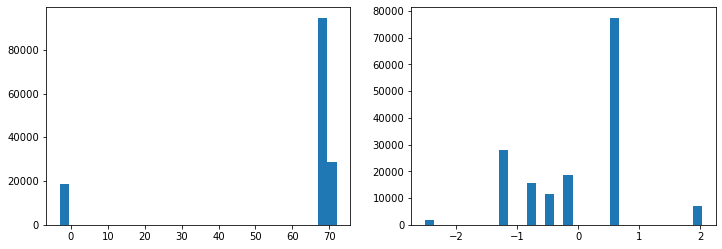

In [137]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
_=ax1.hist(df["4990-0.0"],30)
_=ax2.hist(rank_inv_norm_transform(df["4979-0.0"]),30)

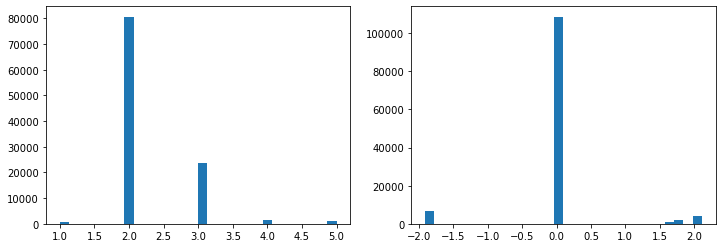

In [138]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
_=ax1.hist(df["20175-0.0"],30)
_=ax2.hist(rank_inv_norm_transform(df["20171-0.0"]),30)

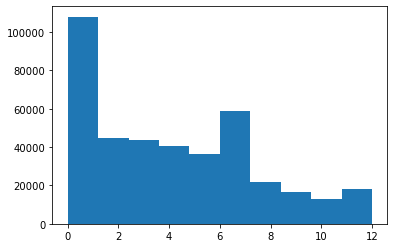

In [9]:
_=plt.hist(df['20127-0.0'])
#plt.xlim((0,2000))

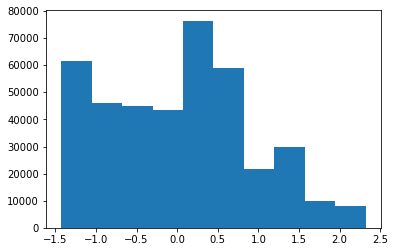

In [10]:
_=plt.hist(df_processed["20127_0_0_quant"])
#plt.xlim((0,30))

In [229]:
df["400-0.1"].min()

0.0

In [208]:
del df_processed["399_0_1_quant"]

In [247]:
df_processed.columns

Index(['FID', 'IID', '21004_2_0_quant', '6373_2_0_quant', '6348_2_0_quant',
       '6350_2_0_quant', '23324_2_0_quant', '4282_0_0_quant',
       '20016_0_0_quant', '4935_0_0', '4946_0_0', '4957_0_0', '4968_0_0',
       '4979_0_0', '4990_0_0', '6348_2_0_quant_nomerge',
       '20156_0_0_quant_nomerge', '5001_0_0', '5012_0_0', '5556_0_0',
       '5699_0_0', '5779_0_0', '5790_0_0', '5866_0_0', '399_0_2_quant',
       '399_0_3_quant', '399_0_1', '400_0_1_quant', '400_0_2_quant',
       '400_0_3_quant', '4294_0_0', '20023_0_0_quant'],
      dtype='object')

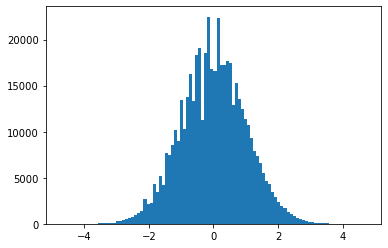

In [278]:
_=plt.hist(df_processed["20023_0_0_quant"],100)

In [280]:
df_processed.to_csv(out_file, index=False, sep="\t", na_rep="NA")
out_file

'/cluster/projects/p33/users/alexeas/most_mental/pheno/cognitive_merged_27_20.processed.csv'